# Data Exploration of Flight Data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-dark")
pal = sns.color_palette()

In [2]:
%load_ext lab_black

## Read in the Data

In [3]:
BASE_DIR = "../input/flight-delay-dataset-20182022"
BASE_DIR = "flights/"
df = pd.read_parquet(f"{BASE_DIR}/flight_data_2018_to_2022.parquet")
df = df.rename(columns={"Operating_Airline ": "Operating_Airline"})
df["Cancelled"] = df["Cancelled"].astype("bool")

# Feature Understanding

We have a lot of columns in this dataset. Here are a few we might want to focus in on:

Major Features of Interest:
- Time Series Features:
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'FlightDate',
- Flight Info:
    - Airline: Marketing_Airline_Network
    - Origin: Origin, OriginCityName
    - Destination: Dest, DestCityName
- Departure / Delay Info:
    - CRSDepTime	CRS Departure Time (local time: hhmm)
    - DepTime	Actual Departure Time (local time: hhmm)
    - DepDelay	Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
    - DepDelayMinutes	Difference in minutes between scheduled and actual departure time. Early departures set to 0.


## Delays by Airline in 2022

In [37]:
CSV = (
    "https://raw.githubusercontent.com/beanumber/airlines/master/data-raw/airlines.csv"
)
airlines = pd.read_csv(CSV)
airline_map = airlines.set_index("Code")["Description"]
airline_counts = df["Operating_Airline"].value_counts()
airline_counts.index = airline_counts.index.map(
    airlines.set_index("Code")["Description"]
).rename("Airline")
airline_counts = (
    airline_counts.sort_values(ascending=True).to_frame("Count").reset_index()
)

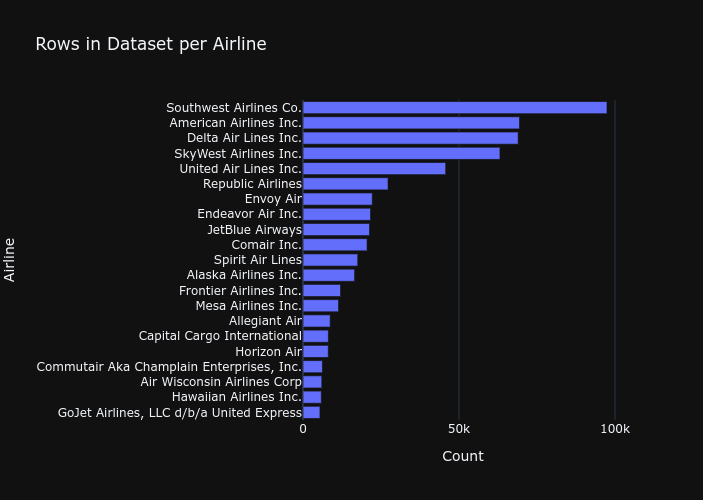

In [70]:
px.bar(
    airline_counts,
    x="Count",
    y="Airline",
    orientation="h",
    template="plotly_dark",
    title="Rows in Dataset per Airline",
    height=500,
)

In [71]:
pct_cancelled = df["Cancelled"].mean() * 100
print(f"Of all flights in this dataset {pct_cancelled:0.2f}% are Cancelled")

Of all flights in this dataset 6.33% are Cancelled


# Which Airlines had the most cancelled by count and %

In [129]:
cancel = (
    (
        (
            df.query("Year == 2022")
            .groupby(["Operating_Airline", "Cancelled"])
            .size()
            .unstack()
            .reset_index()
        )
        .rename(columns={False: "Not Cancelled", True: "Cancelled"})
        .rename_axis(None, axis=1)
    )
    .assign(Total=cancel["Not Cancelled"] + cancel["Cancelled"])
    .assign(Pct_Cancelled=(cancel["Cancelled"] / cancel["Total"]) * 100)
    .assign(Airline=cancel["Operating_Airline"].map(airline_map))
)

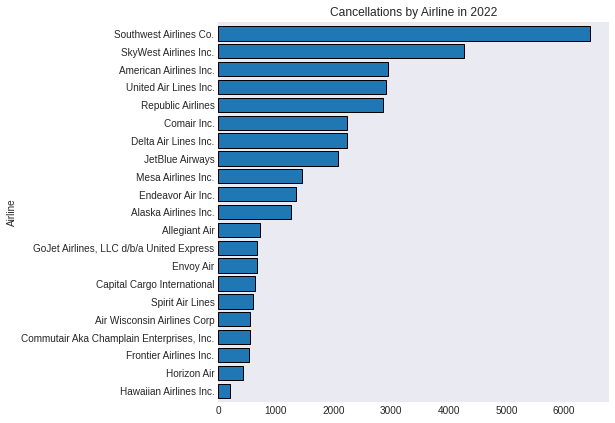

In [188]:
cancel.set_index("Airline").sort_values("Cancelled")["Cancelled"].plot(
    kind="barh",
    figsize=(7, 7),
    title="Cancellations by Airline in 2022",
    width=0.8,
    edgecolor="black",
)
plt.show()

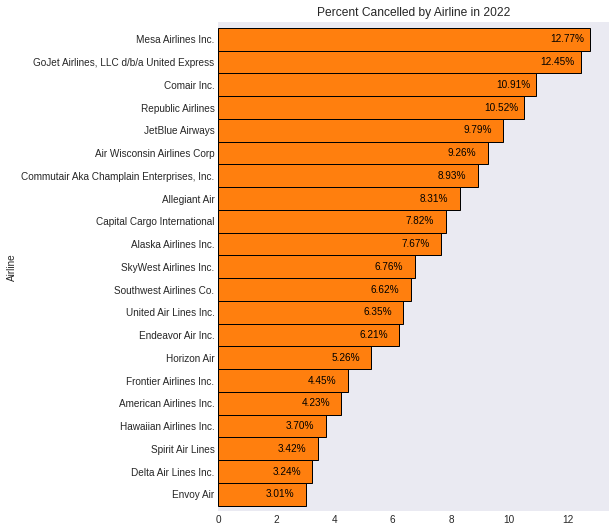

In [187]:
fig, ax = plt.subplots(figsize=(7, 9))
bars = (
    cancel.set_index("Airline")
    .sort_values("Pct_Cancelled")["Pct_Cancelled"]
    .plot(
        kind="barh",
        ax=ax,
        title="Percent Cancelled by Airline in 2022",
        width=1,
        edgecolor="black",
        color=pal[1],
    )
)

ax.bar_label(ax.containers[0], fmt="%0.2f%%", padding=-40, color="black")
plt.show()

In [215]:
pd.to_datetime(df["FlightDate"]).dt.day_of_week

0         3
1         3
2         3
3         3
4         3
         ..
563732    0
563733    0
563734    0
563735    0
563736    0
Name: FlightDate, Length: 563737, dtype: int64

# Read and Combine Years

In [4]:
from glob import glob

In [5]:
csvs = glob("flights/csvs/*.csv")

In [6]:
df = pd.concat([pd.read_csv(c, low_memory=False) for c in csvs])

In [8]:
df.to_parquet("flights/flights_2021_2022")

In [15]:
df = df.rename(columns={"Operating_Airline ": "Operating_Airline"})

In [16]:
KEEP_COLS = [
    # "Year",
    # "Quarter",
    # "Month",
    # "DayofMonth",
    # "DayOfWeek",
    "FlightDate",
    # "Marketing_Airline_Network",
    # "Operated_or_Branded_Code_Share_Partners",
    # "DOT_ID_Marketing_Airline",
    # "IATA_Code_Marketing_Airline",
    # "Flight_Number_Marketing_Airline",
    # "Originally_Scheduled_Code_Share_Airline",
    # "DOT_ID_Originally_Scheduled_Code_Share_Airline",
    # "IATA_Code_Originally_Scheduled_Code_Share_Airline",
    # "Flight_Num_Originally_Scheduled_Code_Share_Airline",
    "Operating_Airline",
    # "DOT_ID_Operating_Airline",
    # "IATA_Code_Operating_Airline",
    # "Tail_Number",
    # "Flight_Number_Operating_Airline",
    "OriginAirportID",
    # "OriginAirportSeqID",
    # "OriginCityMarketID",
    "Origin",
    "OriginCityName",
    "OriginState",
    # "OriginStateFips",
    # "OriginStateName",
    # "OriginWac",
    "DestAirportID",
    # "DestAirportSeqID",
    # "DestCityMarketID",
    "Dest",
    "DestCityName",
    "DestState",
    # "DestStateFips",
    "DestStateName",
    # "DestWac",
    "CRSDepTime",
    "DepTime",
    "DepDelay",
    "DepDelayMinutes",
    "DepDel15",
    "DepartureDelayGroups",
    "DepTimeBlk",
    "TaxiOut",
    "WheelsOff",
    "WheelsOn",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelay",
    "ArrDelayMinutes",
    "ArrDel15",
    "ArrivalDelayGroups",
    "ArrTimeBlk",
    "Cancelled",
    "CancellationCode",
    "Diverted",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "Flights",
    "Distance",
    "DistanceGroup",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    "FirstDepTime",
    "TotalAddGTime",
    "LongestAddGTime",
    # "DivAirportLandings",
    # "DivReachedDest",
    # "DivActualElapsedTime",
    # "DivArrDelay",
    # "DivDistance",
    # "Div1Airport",
    # "Div1AirportID",
    # "Div1AirportSeqID",
    # "Div1WheelsOn",
    # "Div1TotalGTime",
    # "Div1LongestGTime",
    # "Div1WheelsOff",
    # "Div1TailNum",
    # "Div2Airport",
    # "Div2AirportID",
    # "Div2AirportSeqID",
    # "Div2WheelsOn",
    # "Div2TotalGTime",
    # "Div2LongestGTime",
    # "Div2WheelsOff",
    # "Div2TailNum",
    # "Div3Airport",
    # "Div3AirportID",
    # "Div3AirportSeqID",
    # "Div3WheelsOn",
    # "Div3TotalGTime",
    # "Div3LongestGTime",
    # "Div3WheelsOff",
    # "Div3TailNum",
    # "Div4Airport",
    # "Div4AirportID",
    # "Div4AirportSeqID",
    # "Div4WheelsOn",
    # "Div4TotalGTime",
    # "Div4LongestGTime",
    # "Div4WheelsOff",
    # "Div4TailNum",
    # "Div5Airport",
    # "Div5AirportID",
    # "Div5AirportSeqID",
    # "Div5WheelsOn",
    # "Div5TotalGTime",
    # "Div5LongestGTime",
    # "Div5WheelsOff",
    # "Div5TailNum",
    # "Duplicate",
    # "Unnamed: 119",
]

In [22]:
df.memory_usage().sum()

10091519568

In [23]:
df = df[KEEP_COLS].copy()

In [24]:
df.memory_usage().sum()

3940527680

In [25]:
3940527680 / 10091519568

0.39047911996279844

In [26]:
df.head()

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2021-04-05,OH,13277,MGM,"Montgomery, AL",AL,11278,DCA,"Washington, DC",VA,...,693.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-06,OH,13277,MGM,"Montgomery, AL",AL,11278,DCA,"Washington, DC",VA,...,693.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-07,OH,13277,MGM,"Montgomery, AL",AL,11278,DCA,"Washington, DC",VA,...,693.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-08,OH,13277,MGM,"Montgomery, AL",AL,11278,DCA,"Washington, DC",VA,...,693.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-09,OH,13277,MGM,"Montgomery, AL",AL,11278,DCA,"Washington, DC",VA,...,693.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot Cancel % through June 2022

In [29]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])

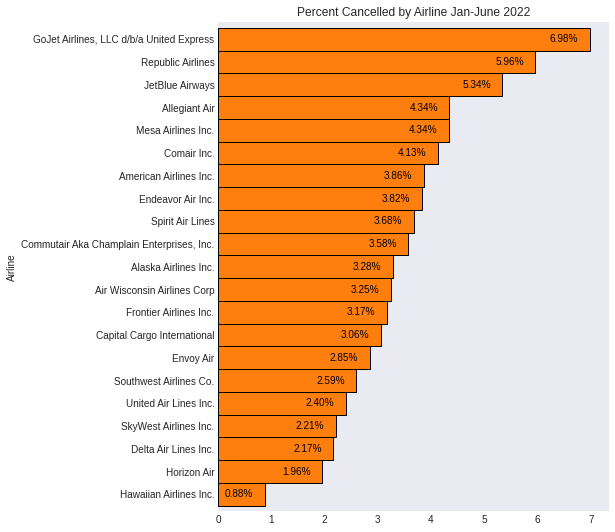

In [39]:
cancel = (
    df.query("20220101 < FlightDate < 20220701")
    .groupby(["Operating_Airline", "Cancelled"])
    .size()
    .unstack()
    .reset_index()
    .rename(columns={False: "Not Cancelled", True: "Cancelled"})
    .rename_axis(None, axis=1)
)

cancel = cancel.assign(Total=cancel["Not Cancelled"] + cancel["Cancelled"])
cancel = cancel.assign(Pct_Cancelled=(cancel["Cancelled"] / cancel["Total"]) * 100)
cancel = cancel.assign(Airline=cancel["Operating_Airline"].map(airline_map))

fig, ax = plt.subplots(figsize=(7, 9))
bars = (
    cancel.set_index("Airline")
    .sort_values("Pct_Cancelled")["Pct_Cancelled"]
    .plot(
        kind="barh",
        ax=ax,
        title="Percent Cancelled by Airline Jan-June 2022",
        width=1,
        edgecolor="black",
        color=pal[1],
    )
)

ax.bar_label(ax.containers[0], fmt="%0.2f%%", padding=-40, color="black")
plt.show()

etween January and June 2022, listed from worst to best:
```
Republic Airways – 6.00%
JetBlue Airways – 5.39%
Mesa Airlines – 4.48%
Allegiant Air – 4.43%
PSA Airlines – 4.13%
American Airlines – 3.88%
Endeavor Air – 3.84%
Spirit Airlines – 3.76%
Alaska Airlines – 3.33%
Frontier Airlines – 3.21%
Envoy Air – 2.96%
Southwest Airlines – 2.66%
United Airlines – 2.44%
Skywest Airlines – 2.36%
Delta Air Lines – 2.20%
Horizon Air – 1.98%
Hawaiian Airlines – 0.97%
```